In [35]:
import numpy as np
import matplotlib.pyplot as plt
import gc
import torch

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()
    torch.cuda.empty_cache()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()
  torch.cuda.empty_cache()

In [32]:
from transformers import pipeline
generator = pipeline("mask-generation", model="facebook/sam-vit-huge", device=0)
     

OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB. GPU 0 has a total capacity of 23.64 GiB of which 15.62 MiB is free. Process 433712 has 23.62 GiB memory in use. Of the allocated memory 23.34 GiB is allocated by PyTorch, and 80.13 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [33]:
torch.cuda.empty_cache()

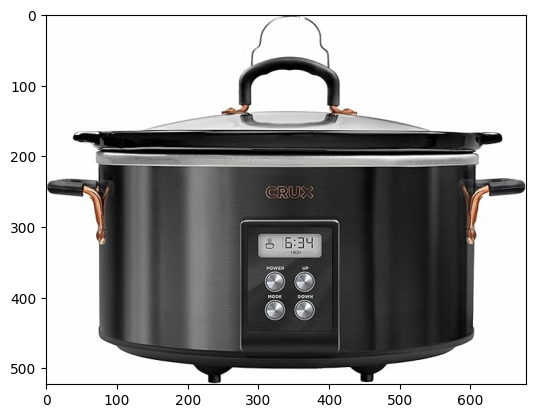

In [9]:
from PIL import Image
import requests


raw_image = Image.open('/home/product_diffusion_api/sample_data/example1.jpg')

plt.imshow(raw_image)
     

In [36]:

outputs = generator(raw_image, points_per_batch=128, pred_iou_thresh=1)

/home/product_diffusion_api/.venv/lib/python3.10/site-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


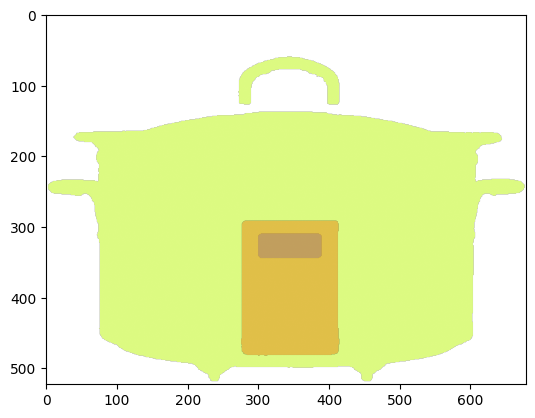

In [37]:
masks = outputs["masks"]
for mask in masks:
    show_mask(mask, ax=plt.gca(), random_color=True)

In [3]:
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import load_image, make_image_grid

pipeline = DiffusionPipeline.from_pretrained(
    "AlekseyKorshuk/sdxl-v0-product-outpainting", torch_dtype=torch.float16
).to("cuda")
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed


# load base and mask image
init_image = load_image("/home/product_diffusion_api/sample_data/example1.jpg")
mask_image = load_image("/home/product_diffusion_api/masks/mask_0.jpg")

generator = torch.Generator("cuda").manual_seed(92)
prompt = "the object  being used in a kitchen for meal prepration , ultrarealistic, high quality, high resolution, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
make_image_grid([init_image, image], rows=1, cols=2)

Fetching 18 files:  33%|███▎      | 6/18 [01:56<05:01, 25.11s/it]